In [ ]:
!pip install feature-engine

In [ ]:
import sys
import pandas as pd
import numpy as np
import joblib
import sklearn
import feature_engine
from sklearn.preprocessing import MinMaxScaler
from feature_engine.wrappers import SklearnTransformerWrapper as ColumnTransformer
from sklearn import set_config
set_config(transform_output="pandas")

In [ ]:
# Versões
print("Versões:")
print('Python -> %s' % sys.version)
print('Pandas -> %s' % pd.__version__)
print('Numpy -> %s' % np.__version__)
print('Sklearn -> %s' % sklearn.__version__)
print('Feature-Engine -> %s' % feature_engine.__version__)

Versões:
Python -> 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
Pandas -> 2.2.2
Numpy -> 2.0.2
Sklearn -> 1.6.1
Feature-Engine -> 1.8.3


### Preprocessing

In [ ]:
ROOT = "/content/drive/MyDrive/dl-project"
DATA_FILE = f"{ROOT}/data/riser_pq_uni.csv"
SEED = 78

rename_dict = {
    "Time (sec)": "time",
    "Pressure (bar) @x_{99}=56.9453": "pressure_1",
    "Pressure (bar) @x_{105}=60.4141": "pressure_2",
    "Pressure (bar) @x_{109}=62.7266": "pressure_3",
    "Pressure (bar) @x_{114}=65.6172": "pressure_4",
    "Pressure (bar) @x_{119}=68.5078": "pressure_5",
    "Pressure (bar) @x_{124}=71.3984": "pressure_6",
    "Pressure (bar) @x_{128}=73.7109": "pressure_7",
    "Gas mass rate (kg/sec)": "gas_flow_rate",
    "Liquid mass rate (kg/sec)": "liquid_flow_rate",
}

TRAINING_STEPS = 1500
TIME = ['time']
FEATURES = [
    'pressure_1',
    'pressure_2',
    'pressure_3',
    'pressure_4',
    'pressure_5',
    'pressure_6',
    'pressure_7'
]
TARGETS = ['gas_flow_rate','liquid_flow_rate']

In [ ]:
data = pd.read_csv(DATA_FILE).rename(columns=rename_dict)

data_ = (
    data[TIME + FEATURES + TARGETS]
    .assign(time=np.floor(data['time']).astype(int))
    .groupby(['time'])[FEATURES + TARGETS].mean()
    .reset_index()
    .sort_values(by='time')
)

data_.head()

,time,pressure_1,pressure_2,pressure_3,pressure_4,pressure_5,pressure_6,pressure_7,gas_flow_rate,liquid_flow_rate
0,0,2.066200,2.038975,1.849575,1.618100,1.394075,1.179475,1.014875,0.021678,55.518500
1,1,2.069233,2.047900,1.862067,1.629967,1.404933,1.188800,1.025567,0.011846,26.402000
2,2,2.064700,2.041100,1.857833,1.625100,1.399833,1.183967,1.019900,0.026317,51.498667
3,3,2.060525,2.036700,1.856600,1.624475,1.399750,1.184250,1.020350,0.035752,62.201250
4,4,2.057700,2.034233,1.856233,1.624233,1.399533,1.184133,1.020267,0.041210,68.307667


In [ ]:
train_data = data_.loc[data_['time'] <= TRAINING_STEPS, :]
test_data = data_.loc[data_['time'] > TRAINING_STEPS, :]

In [ ]:
scaler = ColumnTransformer(
    transformer=MinMaxScaler(),
    variables=FEATURES + TARGETS
)

train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

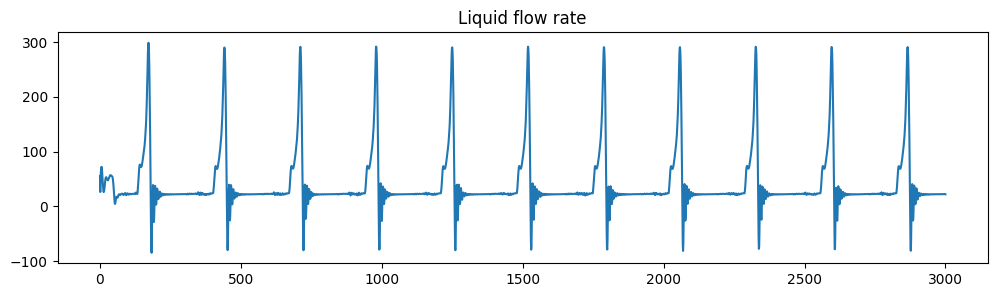

In [ ]:
data_['liquid_flow_rate'].plot(
    title="Liquid flow rate",
    figsize=(12, 3)
);

In [ ]:
train_data_scaled.to_csv(f"{ROOT}/data/train_data_scaled.csv", index=False)
test_data_scaled.to_csv(f"{ROOT}/data/test_data_scaled.csv", index=False)

In [ ]:
joblib.dump(scaler, f"{ROOT}/data/scaler.joblib")

['/content/drive/MyDrive/dl-project/data/scaler.joblib']